In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/kaggle/input/online-retail-ii/online_retail_II.xlsx', sheet_name=0)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [5]:
df.describe(include='object')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
df[df['Customer ID'].isna()].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [7]:
df[df['Quantity'] < 0 ].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [8]:
df['Invoice'] = df['Invoice'].astype('str')

In [9]:
df[df['Invoice'].str.match('^\\d{6}$') == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [10]:
df['Invoice'].str.replace('[0-9]', '', regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
df[df['Invoice'].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [12]:
df['StockCode'] = df['StockCode'].astype('str')


In [13]:
df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a-zA-z]+$') == False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [14]:
df[df['StockCode'].str.contains('^DOT')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


### Data Cleaning

In [15]:
clean_df = df.copy()

In [16]:
clean_df['Invoice'] = clean_df['Invoice'].astype('str')

In [17]:
mask = (
    clean_df['Invoice'].str.match('^\\d{6}$') == True
)

clean_df = clean_df[mask]
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [18]:
clean_df['StockCode'] = clean_df['StockCode'].astype('str')
mask = (
    (clean_df['StockCode'].str.match('^\\d{5}$') == True) 
     | (clean_df['StockCode'].str.match('^\\d{5}[a-zA-z]+$') == True) 
     | (clean_df['StockCode'].str.match('^PADS$') == True) 
)

clean_df = clean_df[mask]
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [19]:
clean_df.dropna(subset=['Customer ID'], inplace=True)

In [20]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543287808,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [21]:
len(clean_df[clean_df['Price'] == 0])

28

In [22]:
claen_df = clean_df[clean_df['Price'] > 0.0]
claen_df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [23]:
len(claen_df)/len(df)

0.7732429238325965

### Feature Engineering

In [24]:
claen_df['SalesLineTotal'] = claen_df['Quantity'] * claen_df['Price']

In [25]:
claen_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [26]:
aggregated_df = claen_df.groupby(by='Customer ID', as_index=False) \
                        .agg( 
                            MonetaryValue = ('SalesLineTotal','sum'),
                            frequency = ('Invoice','nunique'),
                            LastInvoiceDate = ('InvoiceDate','max')
                        )


In [27]:
aggregated_df.head(5)

,Customer ID,MonetaryValue,frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [28]:
max_invoice_date = aggregated_df['LastInvoiceDate'].max()
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

In [29]:
aggregated_df.head(5)

,Customer ID,MonetaryValue,frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


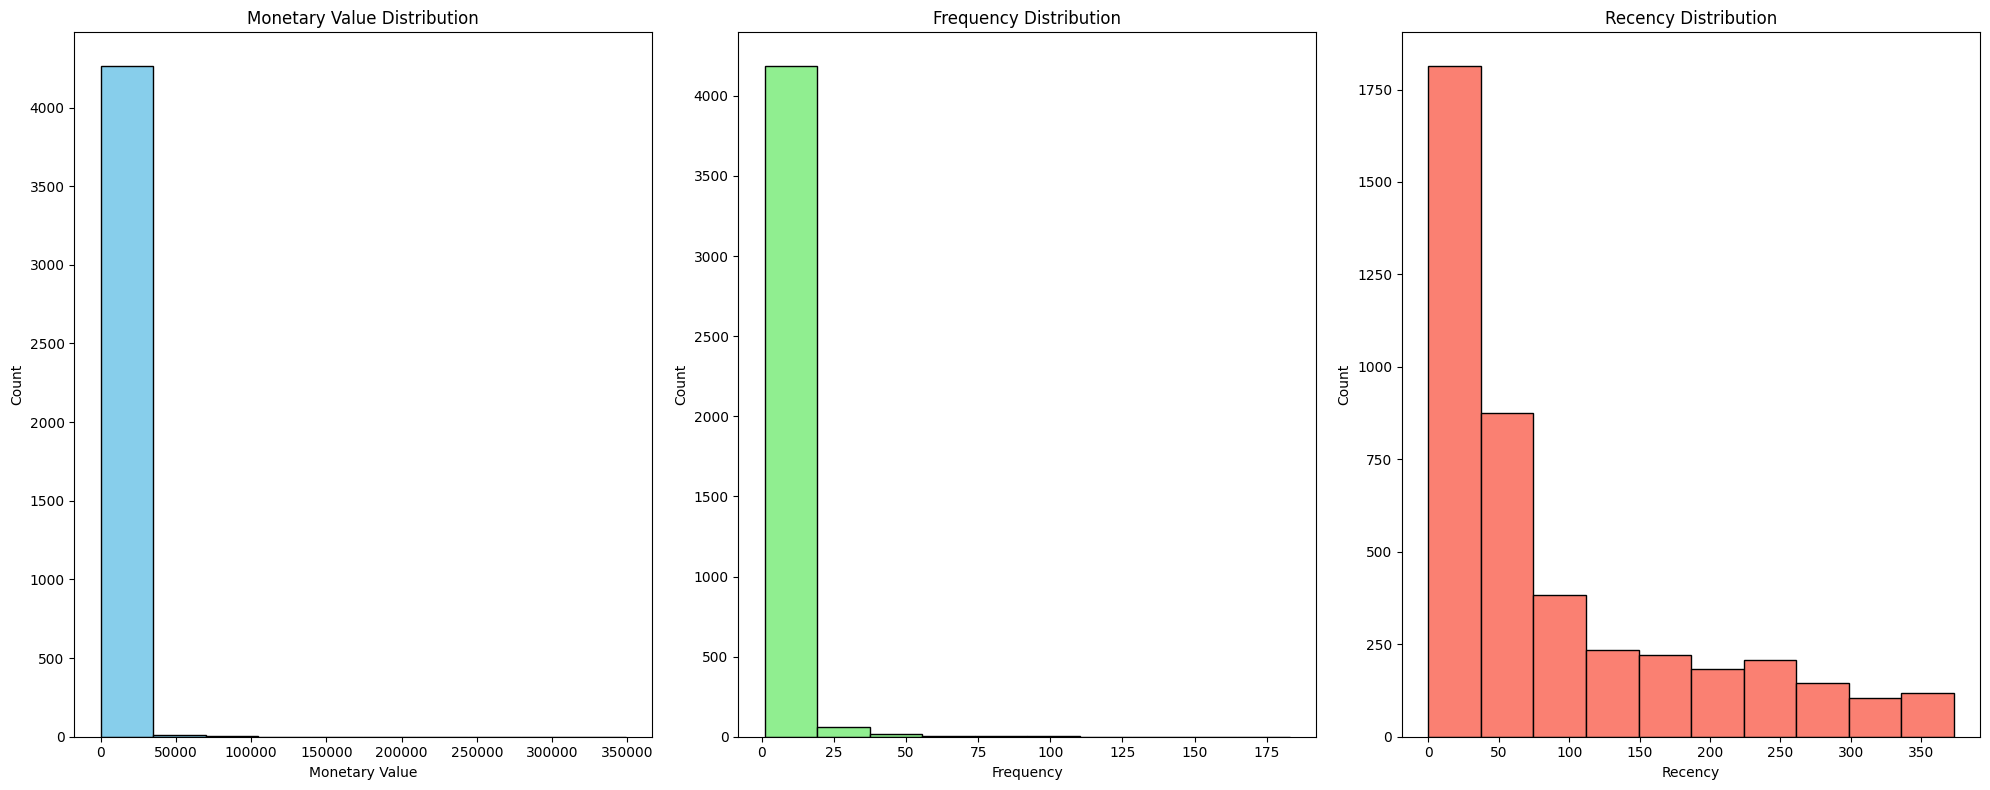

In [30]:
plt.figure(figsize=(20, 8)) 

plt.subplot(1, 3, 1) 
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black') 
plt.title('Monetary Value Distribution') 
plt.xlabel('Monetary Value') 
plt.ylabel('Count') 
           
plt.subplot(1, 3, 2) 
plt.hist(aggregated_df['frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution') 
plt.xlabel('Frequency') 
plt.ylabel('Count') 
           
plt.subplot(1, 3, 3) 
plt.hist(aggregated_df['Recency'], bins=10, color='salmon', edgecolor='black') 
plt.title('Recency Distribution') 
plt.xlabel('Recency') 
plt.ylabel('Count') 
           
plt.tight_layout() 
plt.show()


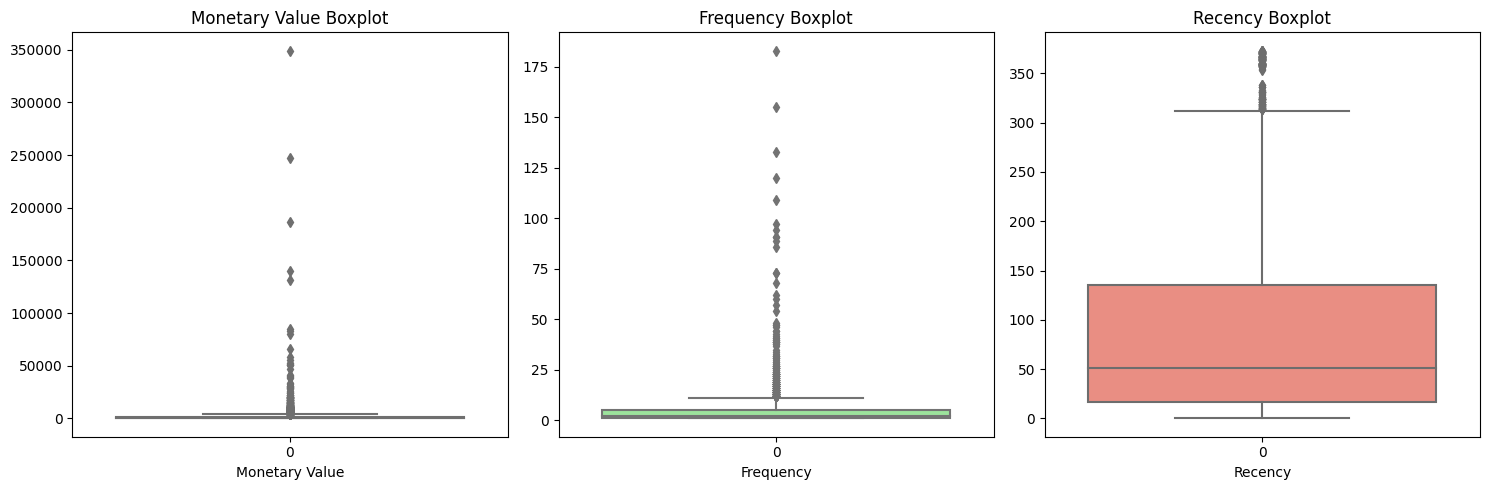

In [31]:
plt.figure(figsize=(15, 5)) 

plt.subplot(1, 3, 1) 
sns.boxplot(data=aggregated_df['MonetaryValue'], color="skyblue") 
plt.title('Monetary Value Boxplot') 
plt.xlabel('Monetary Value') 
            
plt.subplot(1, 3, 2) 
sns.boxplot(data=aggregated_df['frequency'], color='lightgreen')  # Fixed 'colore' to 'color'
plt.title('Frequency Boxplot') 
plt.xlabel('Frequency')
            
plt.subplot(1, 3, 3) 
sns.boxplot(data=aggregated_df['Recency'], color='salmon') 
plt.title('Recency Boxplot') 
plt.xlabel('Recency') 
            
plt.tight_layout() 
plt.show()


In [32]:
m_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)

m_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)

M_IQR = m_Q3 - m_Q1

In [33]:
monetary_outliers = aggregated_df[
    (aggregated_df['MonetaryValue'] > (m_Q3 + 1.5 * M_IQR)) | 
    (aggregated_df['MonetaryValue'] < (m_Q1 - 1.5 * M_IQR))
].copy()


In [34]:
monetary_outliers.describe()

,Customer ID,MonetaryValue,frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [35]:
f_Q1 = aggregated_df['frequency'].quantile(0.25)

f_Q3 = aggregated_df['frequency'].quantile(0.75)

F_IQR = f_Q3 - f_Q1

frequency_outliers = aggregated_df[
    (aggregated_df['frequency'] > (f_Q3 + 1.5 * F_IQR)) | 
    (aggregated_df['frequency'] < (f_Q1 - 1.5 * F_IQR))
].copy()


frequency_outliers.describe()

,Customer ID,MonetaryValue,frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


In [36]:
non_oputliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers.index)) & (~aggregated_df.index.isin(frequency_outliers.index)) ]

In [37]:
non_oputliers_df.describe()

,Customer ID,MonetaryValue,frequency,LastInvoiceDate,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


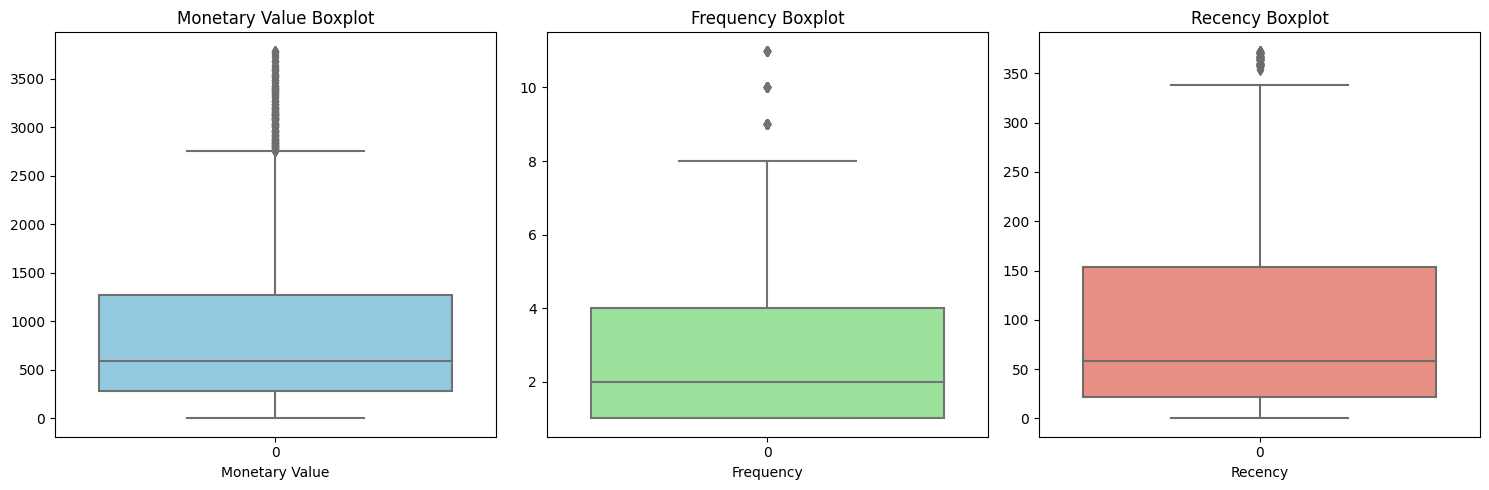

In [38]:
plt.figure(figsize=(15, 5)) 

plt.subplot(1, 3, 1) 
sns.boxplot(data=non_oputliers_df['MonetaryValue'], color="skyblue") 
plt.title('Monetary Value Boxplot') 
plt.xlabel('Monetary Value') 
            
plt.subplot(1, 3, 2) 
sns.boxplot(data=non_oputliers_df['frequency'], color='lightgreen')  # Fixed 'colore' to 'color'
plt.title('Frequency Boxplot') 
plt.xlabel('Frequency')
            
plt.subplot(1, 3, 3) 
sns.boxplot(data=non_oputliers_df['Recency'], color='salmon') 
plt.title('Recency Boxplot') 
plt.xlabel('Recency') 
            
plt.tight_layout() 
plt.show()

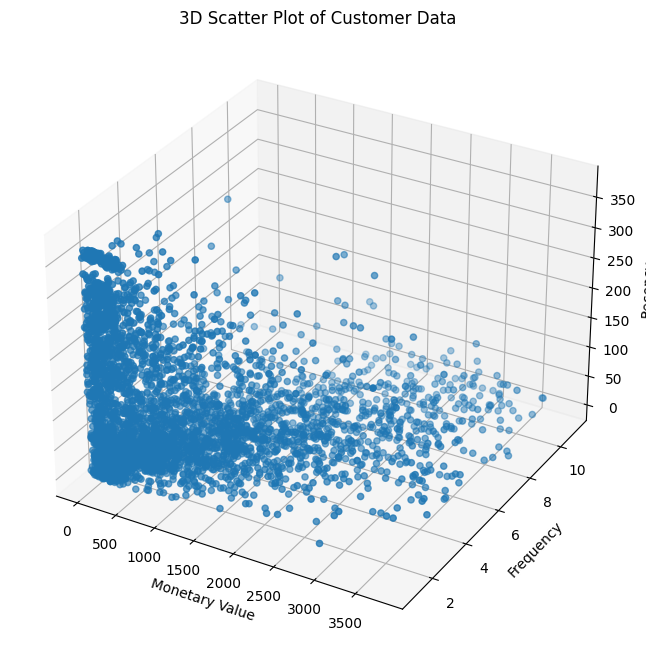

In [39]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_oputliers_df['MonetaryValue'], non_oputliers_df['frequency'], non_oputliers_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

In [40]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_oputliers_df[['MonetaryValue','frequency','Recency']])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [41]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_oputliers_df.index, columns=('MonetaryValue','frequency','Recency'))

scaled_data_df

,MonetaryValue,frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


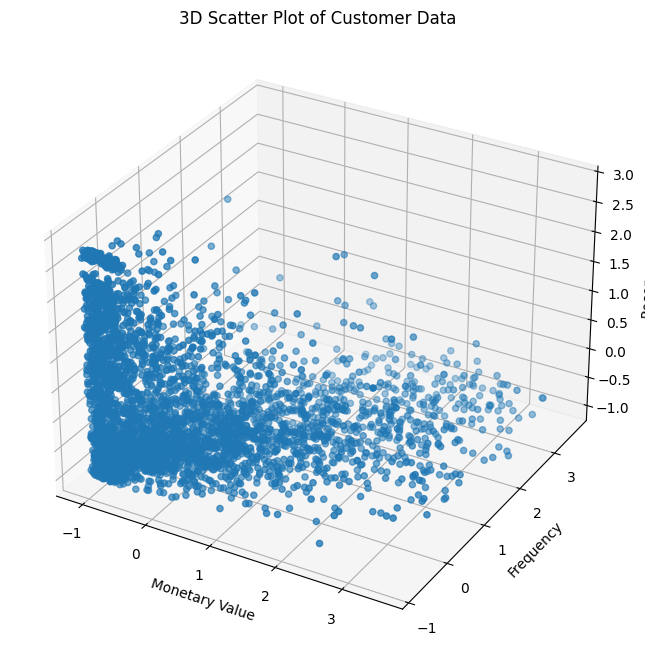

In [42]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['frequency'], scaled_data_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

#### K Mean Clusturing

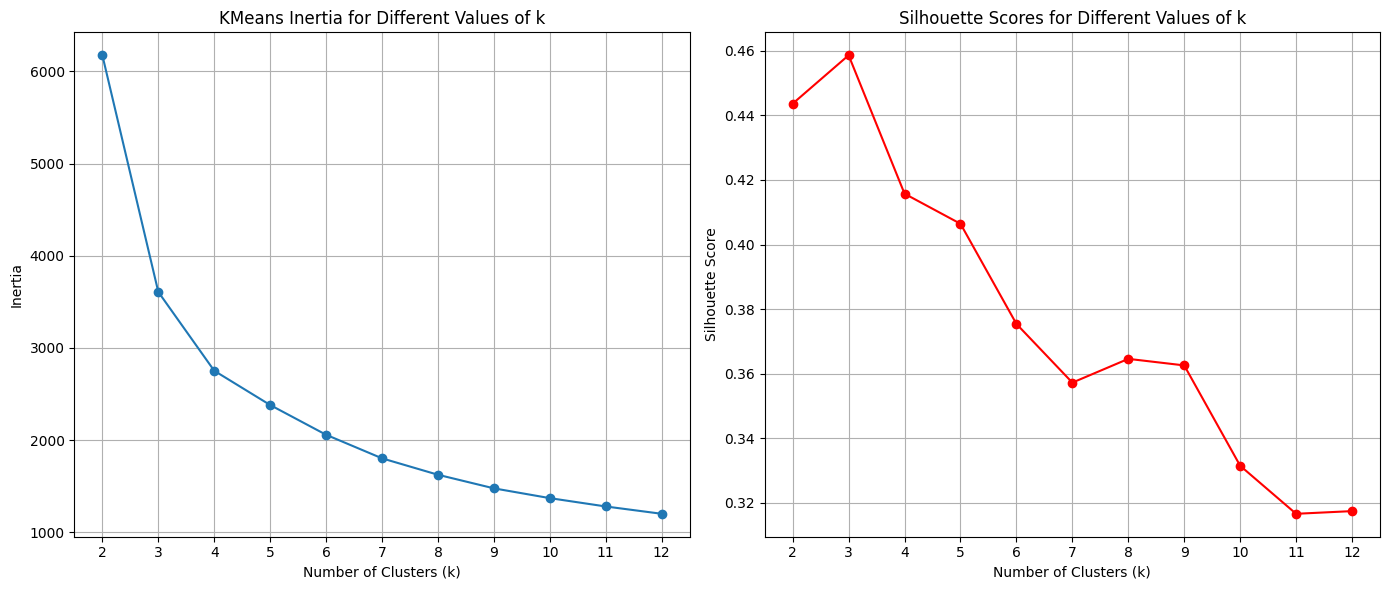

In [43]:
max_k = 12 
inertia = [] 
silhouette_scores_list = []  
k_values = range(2, max_k + 1) 

for k in k_values: 
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    

    sil_scores = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores_list.append(sil_scores)
    

    inertia.append(kmeans.inertia_) 

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o') 
plt.title('KMeans Inertia for Different Values of k') 
plt.xlabel('Number of Clusters (k)') 
plt.ylabel('Inertia') 
plt.xticks(k_values) 
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores_list, marker='o', color='red') 
plt.title('Silhouette Scores for Different Values of k') 
plt.xlabel('Number of Clusters (k)') 
plt.ylabel('Silhouette Score') 
plt.xticks(k_values) 
plt.grid(True)

plt.tight_layout()
plt.show()

